In [2]:
import os
import google.cloud.storage
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import re
from collections import Counter
import csv
from nltk.tokenize import TweetTokenizer
import spacy
import datetime

import nltk
from nltk import word_tokenize 
from nltk.util import ngrams

# Download spacy
# python -m spacy download en_core_web_lg

# Job Postings

In [2]:
indeed_csv = '/Users/kwheatley/Desktop/Capstone/gcloud_data/job_postings%2Findeed_job_postings.csv'
indeed_data = pd.read_csv(indeed_csv, header=None)

# ccars_csv = '/Users/kwheatley/Desktop/Capstone/gcloud_data/job_postings%2Fvirginia_job_posts.csv'
# ccars_data = pd.read_csv(ccars_csv)

In [3]:
indeed_data.columns = ['company','created_date','days_created_before','id','location','salary','scrape_time',
          'search_term','summary_text','title','url']
# indeed_data.drop(['salary','url','id','scrape_time'],axis=1,inplace=True,)
indeed_data.head(1)

,company,created_date,days_created_before,id,location,salary,scrape_time,search_term,summary_text,title,url
0,Murdock Martell,2018-03-19T02:58:33,12,c54bc3126565a2b5,"Saratoga, CA 95070",Not_Found,1522490313,Accounting,We have an Accounting Manager opening with our...,Accounting Manager,https://www.indeed.com/m/viewjob?jk=c54bc31265...


In [4]:
# # Remove all job postings with null job title
# ccars_data = ccars_data[~ccars_data.title.isnull()]

# # Clean non words from job titles and lowercase
# ccars_data.title = ccars_data.title.apply(lambda x: re.sub(r'\W+', ' ', x).lower())
# ccars_data.title = ccars_data.title.apply(lambda x: re.sub(r'[0-9]+', '', x).strip())

# ccars_data.head(1)

In [5]:
# This code converts scrape_time to readable date format
indeed_data.scrape_time = indeed_data.scrape_time.apply(lambda x: datetime.datetime.fromtimestamp(int(x)))

# There were only 3 records without a description. I removed those.
indeed_data = indeed_data[~indeed_data.summary_text.isnull()]

# Date doesn't matter for job postings. However I put a date in there for the unknowns.
indeed_data.loc[indeed_data.created_date == '1900-01-01','created_date'] = \
        indeed_data.loc[indeed_data.created_date == '1900-01-01','scrape_time'] - timedelta(days=int(80))
    
# Clean non words from job titles and lowercase
indeed_data.title = indeed_data.title.apply(lambda x: re.sub(r'\W+', ' ', x).lower())
indeed_data.title = indeed_data.title.apply(lambda x: re.sub(r'[0-9]+', '', x).strip())

In [45]:
# Get a list of the words to be removed
# We are going to look at the x most common words
most_common_words = 1000

# Words identified as needed to be retained but under the cutoff
words_to_keep =['internship', 'vice', 'president', 'ceo', 'cto', 'clo', 'cio', 'cfo', 'coo', 'vi',
                'vii','viii','viiv','vp','scrum','master','logistics','sales','data','extern','externship',
                'researcher','researchers','executive','presales',
                'account','hr', 'eng', 'mgr', 'net', 'web', 'mgr', 'digital', 'solutions',
               'operations','technical','machine','learning','professional','services',
               'consultant','analytics','analytics','supply','chain','management','app','strategist',
               'android','finance','advisor','officer','accountant','resources','office','controller']

# Stop words will be removed from job titles
stop_words = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 
              'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 
              'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 
              'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 
              'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 
              'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 
              'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 
              'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 
              'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 
              'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 
              'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 
              'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 
              'how', 'further', 'was', 'here', 'than', 'in','of','full','part','time',
             'gainesville','fl']

In [46]:
def create_jobs_list(source_data,source):
    word_list = [] # List of all the words used
    jobs_list = [] # All job titles split into tokens

    for job_title in source_data:
        [word_list.append(x) for x in job_title.split()]
        jobs_list.append(job_title)

    # for job_title in ccars_data.title:
    #     [word_list.append(x) for x in job_title.split()]
    #     jobs_list.append(job_title)

    counts = Counter(word_list)

    with open(source+'_dict.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in counts.items():
           writer.writerow([key, value])
    
    return jobs_list
        
# jobs_list = create_jobs_list(indeed_data.title,'indeed_jobs')

In [47]:
counts = Counter(jobs_list)

with open('counts_jobs_unprocessed.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in counts.items():
        if len(key.split()) < 6:
           writer.writerow([key, value])

In [48]:
# Initialize Spacy
nlp = spacy.load('en_core_web_lg')

In [49]:
# This is a dictionary for all the available words in a job title
# Currently, we are only looking at the x most common words
WORDS = dict(counts.most_common(most_common_words))

# We have removed all stop words from the list
for word in stop_words:
    if word in WORDS:
        del WORDS[word]

# We have added back in a list of specific words
for word in words_to_keep:
    WORDS[word] = 400
    
# Add all the lemma variations to the list of possible words
lemma_list = []
for word in WORDS:
    tokens = nlp(word)
    for token in tokens:
        lemma_list.append(token.lemma_)

for word in lemma_list:
    if word not in WORDS:
        WORDS[word] = 400

In [50]:
# Grab all the misspellings that exist
with open('cleaned_misspellings_list.csv', mode='r') as infile:
    reader = csv.reader(infile)
    dict_misspellings = {rows[0]:rows[1] for rows in reader}

In [51]:
def update_job_misspellings(string_job):
    # This code fixes any misspellings in a job title
    list_words = []
    for word in string_job.split():
        if word in dict_misspellings:
            word = dict_misspellings[word]
        list_words.append(word)
    return ' '.join(list_words)


# def update_job_lemma(string_job):
#     # This code performs a SpaCy lemma on all words
#     list_words = []
#     for token in nlp(string_job):
#         if token.text not in ['accountant','accounting','data','sales','devops']:
#             list_words.append(token.lemma_)
#         else:
#             list_words.append(token.text)
#     return ' '.join(list_words)


def update_job_remove_non_essential(string_job):
    # This code performs a SpaCy lemma on all words
    list_words = []
    return ' '.join([word for word in string_job.split() if word in WORDS])


def update_job_remove_stop_words(string_job):
    # This code performs a SpaCy lemma on all words
    list_words = []
    return ' '.join([word for word in string_job.split() if word not in stop_words])


def update_remove_dups(string_job):
    # This code removes duplicate words from the job title
    already_seen_words = []
    list_words = []
    for word in string_job.split():
        if word not in already_seen_words:
            list_words.append(word)
        already_seen_words.append(word)
    return ' '.join(list_words)


def manual_replacement(string_job):
    # This code replaces one word with another
    words_to_replace = {
                        'developer':'engineer',
                        'ui':'ux',
                        'sr':'senior',
                        'jr':'junior',
                        'mgr':'manager',
                        'vp':'vice president',
                        'db':'database',
                        'researchers':'researcher',
                        'service':'services',
                        'eng':'engineering',
    }
    list_words = string_job.split()
    for key in words_to_replace:
        list_words = [words_to_replace[key] 
                               if word == key else word
                               for word in list_words]
    string_job = ' '.join(list_words)

    phrases_to_replace = {
                        'quality assurance':'qa',        
                        'human resources':'hr',
                        'business intelligence':'bi',
                        'full stack':'fullstack',
                        'front end':'frontend',        
                        'back end':'backend',
                        'master data management':'mdm',
    }
    for phrase in phrases_to_replace:
        string_job = string_job.replace(phrase, phrases_to_replace[phrase])
        
    return string_job


def transform_job(job_title):
    # This code runs all the transformations needed for job title
    job_title = update_job_misspellings(job_title)
    job_title = manual_replacement(job_title)
    job_title = update_job_remove_stop_words(job_title)
#     job_title = update_job_lemma(job_title)
    job_title = update_job_remove_non_essential(job_title)
    job_title = update_remove_dups(job_title)
    return job_title


def transform_all_jobs(list_of_jobs):
    # This code iterates through all the jobs in a list
    datetime.datetime.now()
    cleaned_list = []
    for one_job in list_of_jobs:
        cleaned_list.append(transform_job(one_job))
    
    datetime.datetime.now()
    return cleaned_list


phrase_qualifiers = ['mid level','entry level','senior level','experience required',
                    'vice president'
                    ]
qualifiers = ['senior','junior','i','ii',
              'iii','intern','internship','extern','externship',
              'principal','lead','manager','director','controller'
              , 'president','ceo','cio','coo','cto','clo','cfo'
             ]

def get_experience_level(list_of_jobs):
    new_experience_level_list = []
    new_jobs_list = []
    
    for one_job in list_of_jobs:
        qualifier_list = []
        one_job_list = []

        for qualifier in phrase_qualifiers:
            one_job = one_job.replace(qualifier,qualifier.replace(" ","_"))
        
        for word in one_job.split():
            if word in qualifiers + [x.replace(" ","_") for x in phrase_qualifiers]:
                qualifier_list.append(word)
            else:
                one_job_list.append(word)
        new_experience_level_list.append(qualifier_list)
        new_jobs_list.append(' '.join(one_job_list))
    
    return new_jobs_list, new_experience_level_list
#     return new_jobs_list

In [52]:
cleaned_jobs = transform_all_jobs(jobs_list)
# pd.DataFrame(list(set(list(zip(cleaned_jobs,jobs_list))))).to_csv('comparison.csv')

cleaned_jobs, new_experience_level_list = get_experience_level(cleaned_jobs)
# pd.DataFrame(cleaned_jobs).to_csv("jobs_parsed.csv")

KeyboardInterrupt: 

In [ ]:
WORDS['bi']

In [ ]:
transform_all_jobs(['business intelligence consultant'])

In [ ]:
from itertools import combinations

def get_ngrams(input_data,ngram_number,min_count=1):

    ngrams_list = []
    for line in input_data:
         
        comb = list(combinations(line.split(), ngram_number))
        for ngram in comb:
            ngrams_list.append(' '.join(sorted(ngram)))

    count_ngrams = Counter(ngrams_list)

    with open('count_ngrams_' + str(ngram_number) + '.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in count_ngrams.items():
            if value > min_count:
                writer.writerow([key, value])

#     return count_ngrams
    return dict((k, v) for k, v in count_ngrams.items() if v >= min_count)

In [ ]:
def check_for_ngram_match(ngram_number,string,input_dictionary):

    found_ngram = False

    value = 0
    title = ' '.join(sorted(string.split()))
    
    ngrams_list = []
    
    for possible_ngram in list(combinations(string.split(), ngram_number)):
        possible_ngram = ' '.join(sorted(possible_ngram))
        if possible_ngram in input_dictionary:
            if input_dictionary[possible_ngram] > value:
                value = input_dictionary[possible_ngram]
                title = possible_ngram
                found_ngram = True
    
    return title, found_ngram

    
def convert_ngrams(list_of_jobs):
    new_job_titles = []
    for line in list_of_jobs:
        new_title = line
            
        new_title, found_trigram = check_for_ngram_match(3,line,trigram_dict)
            
        if not found_trigram:
                
            new_title, found_bigram = check_for_ngram_match(2,line,bigram_dict)

        new_job_titles.append(new_title)

    return new_job_titles

In [ ]:
new_job_titles = convert_ngrams(cleaned_jobs)

In [18]:
counter_job_titles = Counter(new_job_titles)
with open('indeed_cleaned_jobs.csv','w') as csvfile:
    fieldnames=['title','count']
    writer=csv.writer(csvfile)
    writer.writerow(fieldnames)
    for key, value in counter_job_titles.items():
        writer.writerow([key, value]) 

In [19]:
pd.DataFrame(list(zip(new_job_titles,new_experience_level_list,jobs_list))).to_csv("final_jobs.csv")

In [20]:
indeed_data['converted_job_title'] = new_job_titles
indeed_data['converted_experience_level'] = new_experience_level_list

In [22]:
indeed_data.to_csv('converted_indeed_job_postings.csv')

# Indeed Resumes

In [6]:
resume_csv = '/Users/kwheatley/Desktop/Capstone/gcloud_data/resumes%2Fprocessed_resumes_work.csv'
resume_data = pd.read_csv(resume_csv, header=None)
resume_data.columns = ['city','resume_id','container','role','company','location','dates','descript']

In [16]:
resume_data = resume_data[~resume_data.role.isnull()]

In [32]:
resume_data.role = resume_data.role.apply(lambda x: re.sub(r'\W+', ' ', x).lower())
resume_data.role = resume_data.role.apply(lambda x: re.sub(r'[0-9]+', '', x).strip())

In [53]:
jobs_list = create_jobs_list(resume_data.role,'indeed_resumes') 
cleaned_jobs = transform_all_jobs(jobs_list)
# pd.DataFrame(list(set(list(zip(cleaned_jobs,jobs_list))))).to_csv('comparison.csv')

cleaned_jobs, new_experience_level_list = get_experience_level(cleaned_jobs)
# pd.DataFrame(cleaned_jobs).to_csv("jobs_parsed.csv")

bigram_dict = get_ngrams(cleaned_jobs,2,1)
trigram_dict = get_ngrams(cleaned_jobs,3,50)

new_job_titles = convert_ngrams(cleaned_jobs)


counter_job_titles = Counter(new_job_titles)
with open('indeed_cleaned_jobs.csv','w') as csvfile:
    fieldnames=['title','count']
    writer=csv.writer(csvfile)
    writer.writerow(fieldnames)
    for key, value in counter_job_titles.items():
        writer.writerow([key, value]) 

pd.DataFrame(list(zip(new_job_titles,new_experience_level_list,jobs_list))).to_csv("final_jobs.csv")

In [54]:
resume_data['converted_job_title'] = new_job_titles
resume_data['converted_experience_level'] = new_experience_level_list

In [55]:
resume_data.to_csv('converted_indeed_job_resumes.csv')

In [56]:
resume_data.head()

,city,resume_id,container,role,company,location,dates,descript,converted_job_title,converted_experience_level
0,atlanta,0004d469fc497102,work-experience-items,senior informix database administrator,Breckinridge Insurance,"Kennesaw, GA",July 2017 to Present,.Informix DBA for Breckinridge Insurance appli...,administrator database,[senior]
1,atlanta,0004d469fc497102,work-experience-items,senior informix dba database administrator,INTERCALL Inc,NaN,January 2007 to June 2017,.Informix Database Administor for InterCall's ...,administrator database dba,[senior]
2,atlanta,0004d469fc497102,work-experience-items,oracle informix dba database administrator,Accenture/Bellsouth Telecommuncations Inc,NaN,March 2004 to December 2007,.Oracle Database for OPEDS production support....,administrator database oracle,[]
3,atlanta,0004d469fc497102,work-experience-items,peoplesoft hrms oracle dba database administrator,ACENTRON/Michelin Inc,NaN,March 2003 to February 2004,.Responsible for Migrating objects and Project...,administrator database oracle,[]
4,atlanta,0004d469fc497102,work-experience-items,informix oracle database administrator,BellSouth Telecommunications INC,NaN,November 1998 to January 2003,.Worked on various projects for BellSouth. Wor...,administrator database oracle,[]


In [99]:
# pt_doc = nlp(u"presidents aws")

# for token in pt_doc:
#     print(token)

# for token in pt_doc:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#           token.shape_, token.is_alpha, token.is_stop)
#     print()

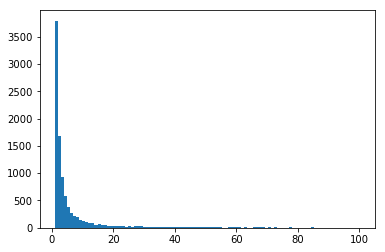

In [88]:
# Histogram of word count
hist_data = [value for key,value in counts.items()]
plt.hist(hist_data,bins=100,range=(1,100))
plt.show()

In [91]:
# indeed_data['principle'.isin(indeed_data.title)]
# indeed_data[indeed_data['title'].str.contains("principle")].title.unique()

In [65]:
data = list(zip(experience_list, title_list,jobs_list))

2017-12-01 14:57:15
2018-03-31 13:46:20


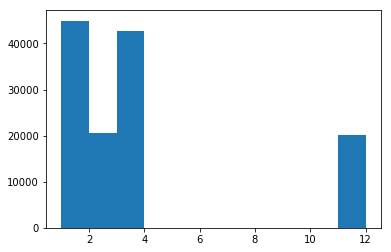

In [98]:
print(indeed_data.created_date.min())
print(indeed_data.created_date.max())
hist_data = indeed_data.created_date.apply(lambda x: x.month)
plt.hist(hist_data, bins = 11)
plt.show()

In [167]:
for i, row in indeed_data.head(1).iterrows():
    print(row.title)
    print(row.summary_text)    
    matches = re.findall("(\d+).? (years|yrs)", row.summary_text)
    print(matches)
    print()

accounting manager
We have an Accounting Manager opening with our client, a growing software start-up company. This is highly innovative company that offers a great company culture with a flexible work environment. Job Description: Reporting to the Controller, the accounting manager will be responsible for international entities (UK, Australia, New Zealand, Philippine, Malaysia, UAE, Singapore, Hong Kong, Spain, Ireland and Japan) and oversight of core accounting functions including: 1) monthly and annual accounting close and reporting for overseas entities, 2) overseas statutory audit and compliance filings, and 3) overseas entity payroll, 3rd party vendor invoice and employee expense payment and reporting process. Additional responsibilities may include supporting worldwide consolidations and eliminations, key management reporting packages, and ad-hoc projects. The successful candidate will ensure that the books are closed in a timely and accurate way each month and will help drive k